<a href="https://colab.research.google.com/github/okaybuyukdeveci/MLprojects/blob/main/cat_vs_dogs_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs and Cats Classification

In [1]:
# install tensorflow-datasets
!pip install tensorflow-datasets

In [29]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [3]:
# load the data
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.H8SZHZ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
class_names=info.features['label'].names
class_names

['cat', 'dog']

In [6]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

In [30]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential


datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


# Build CNN Model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
# CNN Model
model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))


# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))


# 3rd Layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile and fit the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


582/582 ━━━━━━━━━━━━━━━━━━━━ 141s 228ms/step - accuracy: 0.5499 - loss: 0.7232 - val_accuracy: 0.6601 - val_loss: 0.6178
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 129s 220ms/step - accuracy: 0.6727 - loss: 0.6054 - val_accuracy: 0.7041 - val_loss: 0.5667
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 128s 217ms/step - accuracy: 0.7110 - loss: 0.5520 - val_accuracy: 0.7327 - val_loss: 0.5112
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 130s 221ms/step - accuracy: 0.7586 - loss: 0.4989 - val_accuracy: 0.7783 - val_loss: 0.4765
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 128s 218ms/step - accuracy: 0.7796 - loss: 0.4655 - val_accuracy: 0.7732 - val_loss: 0.4698
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 217ms/step - accuracy: 0.7974 - loss: 0.4374 - val_accuracy: 0.8138 - val_loss: 0.4052
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 126s 215ms/step - accuracy: 0.8017 - loss: 0.4295 - val_accuracy: 0.8256 - val_loss: 0.3835
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 125s 214ms/step - accuracy: 0.8208 - loss: 0.39

In [33]:
history.history

{'accuracy': [0.6121648550033569,
  0.726667046546936,
  0.7663747072219849,
  0.7830315232276917,
  0.8011928200721741,
  0.8173123598098755,
  0.8217720985412598,
  0.8337004780769348,
  0.843909502029419,
  0.850411057472229],
 'loss': [0.6517120003700256,
  0.5414758324623108,
  0.48381584882736206,
  0.4543444514274597,
  0.43096688389778137,
  0.40912020206451416,
  0.392253041267395,
  0.37107568979263306,
  0.35646674036979675,
  0.3423074781894684],
 'val_accuracy': [0.6779187321662903,
  0.7602666020393372,
  0.7794022560119629,
  0.8019780516624451,
  0.8234788179397583,
  0.8391743898391724,
  0.8129434585571289,
  0.8520748019218445,
  0.8421844840049744,
  0.8619651794433594],
 'val_loss': [0.5896487236022949,
  0.49230995774269104,
  0.47276175022125244,
  0.42855268716812134,
  0.38734403252601624,
  0.37508535385131836,
  0.4024962782859802,
  0.3539741039276123,
  0.354716956615448,
  0.3191789984703064]}

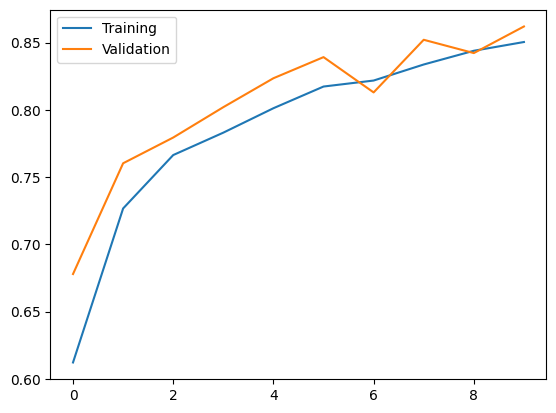

In [31]:
# visualizing the data

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])

In [40]:
def plot_loss_curves(history):

  #Returns separate loss curves for training and validation metrics.


  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

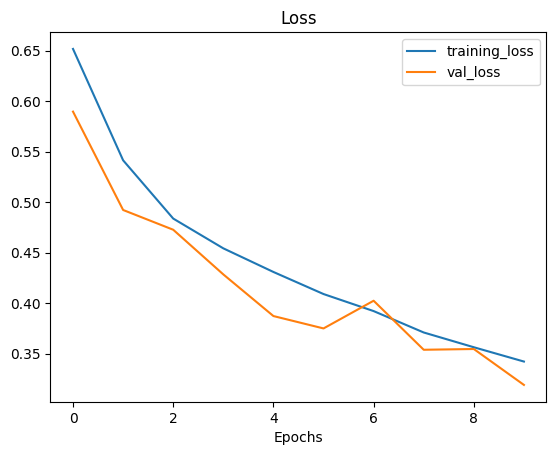

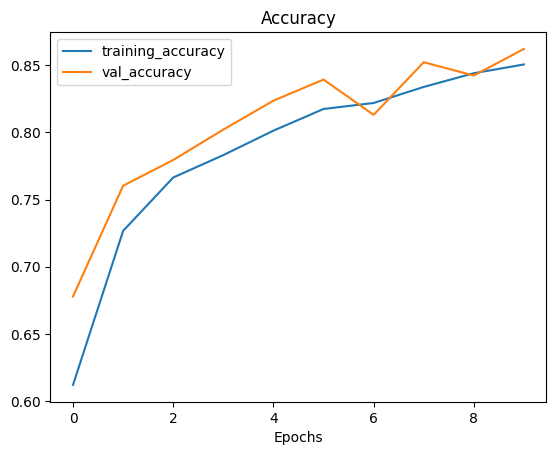

In [41]:
plot_loss_curves(history)

In [16]:
# save model

model.save('cats_vs_dogs.h5')

In [17]:
model_load=tf.keras.models.load_model('cats_vs_dogs.h5')

# Building more efficient CNN model

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
# CNN Model
model_1 = Sequential()

# 1st layer CNN
model_1.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model_1.add(MaxPooling2D(2))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

# 2nd layer CNN
model_1.add(Conv2D(64, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D(2))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

# 3rd Layer
model_1.add(Conv2D(128, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D(2))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dropout(0.5))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(train_generator, epochs=10, validation_data=validation_generator)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


582/582 ━━━━━━━━━━━━━━━━━━━━ 139s 225ms/step - accuracy: 0.6065 - loss: 3.1836 - val_accuracy: 0.5749 - val_loss: 0.8360
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 216ms/step - accuracy: 0.7230 - loss: 0.5494 - val_accuracy: 0.7235 - val_loss: 0.5647
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 216ms/step - accuracy: 0.7542 - loss: 0.5012 - val_accuracy: 0.7732 - val_loss: 0.5004
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 129s 219ms/step - accuracy: 0.7726 - loss: 0.4800 - val_accuracy: 0.7521 - val_loss: 0.5688
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 128s 217ms/step - accuracy: 0.7877 - loss: 0.4578 - val_accuracy: 0.7444 - val_loss: 0.5282
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 216ms/step - accuracy: 0.8053 - loss: 0.4209 - val_accuracy: 0.8000 - val_loss: 0.4369
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 126s 214ms/step - accuracy: 0.8184 - loss: 0.4056 - val_accuracy: 0.7816 - val_loss: 0.4689
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 126s 214ms/step - accuracy: 0.8172 - loss: 0.40

In [23]:
y_pred = model_1.predict(validation_generator)
y_pred

146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step


array([[0.48038423],
       [0.4781911 ],
       [0.4775916 ],
       ...,
       [0.48815182],
       [0.48616388],
       [0.480035  ]], dtype=float32)

In [48]:
model.evaluate(validation_generator)

146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 169ms/step - accuracy: 0.8604 - loss: 0.3165


[0.3174988031387329, 0.8628252148628235]

In [49]:
model_1.evaluate(train_generator)

582/582 ━━━━━━━━━━━━━━━━━━━━ 100s 172ms/step - accuracy: 0.7808 - loss: 0.4541


[0.4546866714954376, 0.783085286617279]

In [26]:
y_true = validation_generator.labels
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [27]:
from sklearn.metrics import confusion_matrix

# Gerçek ve tahmin edilen değerler
cm = confusion_matrix(y_true, y_pred.round())  # y_pred'i binary sınırlama için round yap
print(cm)


[[2243   88]
 [2257   63]]


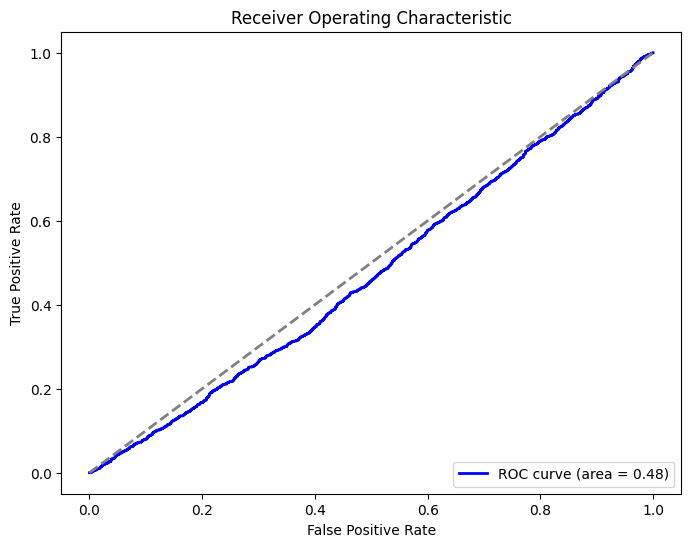

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
plot_loss_curves(history_1)

In [45]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()



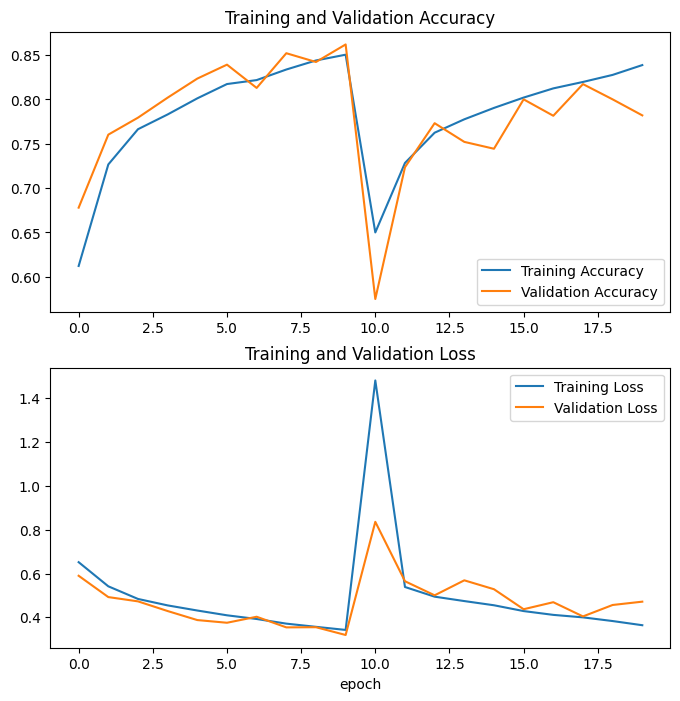

In [46]:
compare_historys(history, history_1)

In [51]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

# Define the image URL to be fetched
img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"

# Download the image from the URL and resize it to (150x150)
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

# Convert the image to a NumPy array
image_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape (e.g., (1, 150, 150, 3))
img = np.expand_dims(image_array, axis=0)

# Normalize the image pixel values to the range [0, 1]
img = img / 255

# Use the trained model to predict the class of the image
prediction = model.predict(img)

# Define a threshold (TH) to classify the prediction into binary classes
TH = 0.5
prediction = int(prediction[0][0] > TH)  # 1 if prediction > TH, else 0

# Map the prediction to class names using the class indices from the training generator
classes = {v: k for k, v in train_generator.class_indices.items()}
classes[prediction]  # Get the class name corresponding to the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'cat'